## Business Understanding

In [1]:
%pip install pyodbc
%pip install  python-dotenv 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Loading Packages

In [108]:
import pyodbc
from dotenv import dotenv_values
import pandas as pd
import warnings
#For visualizations
import matplotlib.pyplot as plt
import seaborn as sns
import re 
import numpy as np
import scipy



warnings.filterwarnings('ignore')



In [3]:

# Load environment variables from .env file into a dictionary
environment_variables = dotenv_values('.env')
 
# Get the values for the credentials you set in the '.env' file
server = environment_variables.get("SERVER")
database = environment_variables.get("DATABASE")
username = environment_variables.get("UID")
password = environment_variables.get("PWD")
 
connection_string = f"DRIVER={{SQL Server}};SERVER={server};DATABASE={database};UID={username};PWD={password}"

In [4]:
connection=pyodbc.connect(connection_string)

## retrieving the data sets

In [5]:
# Now the sql query to get the data is what what you see below.
# Note that you will not have permissions to insert delete or update this database table.
 
# SQL query to fetch data from 'dbo.LP1_startup_funding2020' table
query = "Select * from dbo.LP1_startup_funding2020"
 
# Read data from the SQL query result
data_2020 = pd.read_sql(query, connection)
 
 # Display the first few rows of the DataFrame
data_2020.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,column10
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,None
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,None
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,None
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,None
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,None


In [6]:
# Get summary information about the DataFrame
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1055 entries, 0 to 1054
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1055 non-null   object 
 1   Founded        842 non-null    float64
 2   HeadQuarter    961 non-null    object 
 3   Sector         1042 non-null   object 
 4   What_it_does   1055 non-null   object 
 5   Founders       1043 non-null   object 
 6   Investor       1017 non-null   object 
 7   Amount         801 non-null    float64
 8   Stage          591 non-null    object 
 9   column10       2 non-null      object 
dtypes: float64(2), object(8)
memory usage: 82.5+ KB


In [7]:
#drop not useful column
data_2020.drop(columns="column10", inplace=True)

In [8]:
# Now the sql query to get the data is what what you see below.
# Note that you will not have permissions to insert delete or update this database table.
 
# SQL query to fetch data from 'dbo.LP1_startup_funding2020' table
query = "Select * from dbo.LP1_startup_funding2021"
 
# Read data from the SQL query result
data_2021 = pd.read_sql(query, connection)
 
 # Display the first few rows of the DataFrame
data_2021.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D
3,Bizongo,2015.0,Mumbai,B2B E-commerce,Bizongo is a business-to-business online marke...,"Aniket Deb, Ankit Tomar, Sachin Agrawal","CDC Group, IDG Capital","$51,000,000",Series C
4,FypMoney,2021.0,Gurugram,FinTech,"FypMoney is Digital NEO Bank for Teenagers, em...",Kapil Banwari,"Liberatha Kallat, Mukesh Yadav, Dinesh Nagpal","$2,000,000",Seed


In [9]:
# Get summary information about the DataFrame
data_2021.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1209 entries, 0 to 1208
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company_Brand  1209 non-null   object 
 1   Founded        1208 non-null   float64
 2   HeadQuarter    1208 non-null   object 
 3   Sector         1209 non-null   object 
 4   What_it_does   1209 non-null   object 
 5   Founders       1205 non-null   object 
 6   Investor       1147 non-null   object 
 7   Amount         1206 non-null   object 
 8   Stage          781 non-null    object 
dtypes: float64(1), object(8)
memory usage: 85.1+ KB


In [10]:
data_2019 = pd.read_csv('startup_funding2019.csv')
 
# Display the first few rows of the DataFrame
data_2019.head()

,Company/Brand,Founded,HeadQuarter,Sector,What it does,Founders,Investor,Amount($),Stage
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN


In [11]:
# Get summary information about the DataFrame
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Company/Brand  89 non-null     object 
 1   Founded        60 non-null     float64
 2   HeadQuarter    70 non-null     object 
 3   Sector         84 non-null     object 
 4   What it does   89 non-null     object 
 5   Founders       86 non-null     object 
 6   Investor       89 non-null     object 
 7   Amount($)      89 non-null     object 
 8   Stage          43 non-null     object 
dtypes: float64(1), object(8)
memory usage: 6.4+ KB


In [12]:
data_2018 = pd.read_csv('startup_funding2018.csv')
 
# Display the first few rows of the DataFrame
data_2018.head()

,Company Name,Industry,Round/Series,Amount,Location,About Company
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f..."
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...


In [13]:
# Get summary information about the DataFrame
data_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 526 entries, 0 to 525
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Company Name   526 non-null    object
 1   Industry       526 non-null    object
 2   Round/Series   526 non-null    object
 3   Amount         526 non-null    object
 4   Location       526 non-null    object
 5   About Company  526 non-null    object
dtypes: object(6)
memory usage: 24.8+ KB


## Data Cleaning

#### Check for duplicates

In [14]:
data_2018.duplicated().sum()

1

In [15]:
data_2019.duplicated().sum()

0

In [16]:
data_2020.duplicated().sum()

3

In [17]:
data_2021.duplicated().sum()

19

### Drop duplicates

In [18]:
clean_d_2018=data_2018.drop_duplicates()


In [19]:
clean_d_2018.duplicated().sum()

0

In [20]:
clean_d_2020=data_2020.drop_duplicates()

In [21]:
clean_d_2020.duplicated().sum()

0

In [22]:
clean_d_2021=data_2021.drop_duplicates()

In [23]:
clean_d_2021.duplicated().sum()

0

In [24]:
# Adding a new "Year" column with the value of its value to all rows
data_2018['Funding Year'] = 2018
data_2019['Funding Year'] = 2019
data_2020['Funding Year'] = 2020
data_2021['Funding Year'] = 2021

### Rename columns in 2018

In [25]:

# Rename columns in data_2018 DataFrame
data_2018.rename(columns={'Company Name': 'Company_Brand', 'Industry': 'Sector', 'Round/Series': 'Stage', 'Location': 'HeadQuarter', 'About Company': 'What_it_does'}, inplace=True)

In [26]:
data_2018

,Company_Brand,Sector,Stage,Amount,HeadQuarter,What_it_does,Funding Year
0,TheCollegeFever,"Brand Marketing, Event Promotion, Marketing, S...",Seed,250000,"Bangalore, Karnataka, India","TheCollegeFever is a hub for fun, fiesta and f...",2018
1,Happy Cow Dairy,"Agriculture, Farming",Seed,"₹40,000,000","Mumbai, Maharashtra, India",A startup which aggregates milk from dairy far...,2018
2,MyLoanCare,"Credit, Financial Services, Lending, Marketplace",Series A,"₹65,000,000","Gurgaon, Haryana, India",Leading Online Loans Marketplace in India,2018
3,PayMe India,"Financial Services, FinTech",Angel,2000000,"Noida, Uttar Pradesh, India",PayMe India is an innovative FinTech organizat...,2018
4,Eunimart,"E-Commerce Platforms, Retail, SaaS",Seed,—,"Hyderabad, Andhra Pradesh, India",Eunimart is a one stop solution for merchants ...,2018
...,...,...,...,...,...,...,...
521,Udaan,"B2B, Business Development, Internet, Marketplace",Series C,225000000,"Bangalore, Karnataka, India","Udaan is a B2B trade platform, designed specif...",2018
522,Happyeasygo Group,"Tourism, Travel",Series A,—,"Haryana, Haryana, India",HappyEasyGo is an online travel domain.,2018
523,Mombay,"Food and Beverage, Food Delivery, Internet",Seed,7500,"Mumbai, Maharashtra, India",Mombay is a unique opportunity for housewives ...,2018
524,Droni Tech,Information Technology,Seed,"₹35,000,000","Mumbai, Maharashtra, India",Droni Tech manufacture UAVs and develop softwa...,2018


### Rename columns in 2019

In [27]:

# Rename columns in data_2019 DataFrame
data_2019.rename(columns={'Company/Brand':'Company_Brand', 'Amount($)':'Amount','What it does':'What_it_does'}, inplace=True)

In [28]:
data_2019.head()

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding Year
0,Bombay Shaving,NaN,NaN,Ecommerce,Provides a range of male grooming products,Shantanu Deshpande,Sixth Sense Ventures,"$6,300,000",NaN,2019
1,Ruangguru,2014.0,Mumbai,Edtech,A learning platform that provides topic-based ...,"Adamas Belva Syah Devara, Iman Usman.",General Atlantic,"$150,000,000",Series C,2019
2,Eduisfun,NaN,Mumbai,Edtech,It aims to make learning fun via games.,Jatin Solanki,"Deepak Parekh, Amitabh Bachchan, Piyush Pandey","$28,000,000",Fresh funding,2019
3,HomeLane,2014.0,Chennai,Interior design,Provides interior designing solutions,"Srikanth Iyer, Rama Harinath","Evolvence India Fund (EIF), Pidilite Group, FJ...","$30,000,000",Series D,2019
4,Nu Genes,2004.0,Telangana,AgriTech,"It is a seed company engaged in production, pr...",Narayana Reddy Punyala,Innovation in Food and Agriculture (IFA),"$6,000,000",NaN,2019


In [29]:
data_2020.head(3)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding Year
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,2020


In [30]:
data_2021.head(3)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding Year
0,Unbox Robotics,2019.0,Bangalore,AI startup,Unbox Robotics builds on-demand AI-driven ware...,"Pramod Ghadge, Shahid Memon","BEENEXT, Entrepreneur First","$1,200,000",Pre-series A,2021
1,upGrad,2015.0,Mumbai,EdTech,UpGrad is an online higher education platform.,"Mayank Kumar, Phalgun Kompalli, Ravijot Chugh,...","Unilazer Ventures, IIFL Asset Management","$120,000,000",None,2021
2,Lead School,2012.0,Mumbai,EdTech,LEAD School offers technology based school tra...,"Smita Deorah, Sumeet Mehta","GSV Ventures, Westbridge Capital","$30,000,000",Series D,2021


#### Concatenate data sets

In [31]:

concatenated = pd.concat([data_2020, data_2021, data_2019, data_2018], ignore_index=True)
concatenated.head(10)

,Company_Brand,Founded,HeadQuarter,Sector,What_it_does,Founders,Investor,Amount,Stage,Funding Year
0,Aqgromalin,2019.0,Chennai,AgriTech,Cultivating Ideas for Profit,"Prasanna Manogaran, Bharani C L",Angel investors,200000.0,None,2020
1,Krayonnz,2019.0,Bangalore,EdTech,An academy-guardian-scholar centric ecosystem ...,"Saurabh Dixit, Gurudutt Upadhyay",GSF Accelerator,100000.0,Pre-seed,2020
2,PadCare Labs,2018.0,Pune,Hygiene management,Converting bio-hazardous waste to harmless waste,Ajinkya Dhariya,Venture Center,NaN,Pre-seed,2020
3,NCOME,2020.0,New Delhi,Escrow,Escrow-as-a-service platform,Ritesh Tiwari,"Venture Catalysts, PointOne Capital",400000.0,None,2020
4,Gramophone,2016.0,Indore,AgriTech,Gramophone is an AgTech platform enabling acce...,"Ashish Rajan Singh, Harshit Gupta, Nishant Mah...","Siana Capital Management, Info Edge",340000.0,None,2020
5,qZense,2019.0,Bangalore,AgriTech,qZense Labs is building the next-generation Io...,"Rubal Chib, Dr Srishti Batra","Venture Catalysts, 9Unicorns Accelerator Fund",600000.0,Seed,2020
6,MyClassboard,2008.0,Hyderabad,EdTech,MyClassboard is a full-fledged School / Colleg...,Ajay Sakhamuri,ICICI Bank.,600000.0,Pre-series A,2020
7,Metvy,2018.0,Gurgaon,Networking platform,AI driven networking platform for individuals ...,Shawrya Mehrotra,HostelFund,NaN,Pre-series,2020
8,Rupeek,2015.0,Bangalore,FinTech,Rupeek is an online lending platform that spec...,"Amar Prabhu, Ashwin Soni, Sumit Maniyar","KB Investment, Bertelsmann India Investments",45000000.0,Series C,2020
9,Gig India,2017.0,Pune,Crowdsourcing,GigIndia is a marketplace that provides on-dem...,"Aditya Shirole, Sahil Sharma","Shantanu Deshpande, Subramaniam Ramadorai",1000000.0,Pre-series A,2020


In [32]:
data=concatenated.drop(columns={'Founders','What_it_does','Investor'},axis=1)
data.head(2)

,Company_Brand,Founded,HeadQuarter,Sector,Amount,Stage,Funding Year
0,Aqgromalin,2019.0,Chennai,AgriTech,200000.0,None,2020
1,Krayonnz,2019.0,Bangalore,EdTech,100000.0,Pre-seed,2020


In [33]:
#Checking columns
data['Sector'].unique()

array(['AgriTech', 'EdTech', 'Hygiene management', 'Escrow',
       'Networking platform', 'FinTech', 'Crowdsourcing',
       'Food & Bevarages', 'HealthTech', 'Fashion startup',
       'Food Industry', 'Food Delivery', 'Virtual auditing startup',
       'E-commerce', 'Gaming', 'Work fulfillment', 'AI startup',
       'Telecommunication', 'Logistics', 'Tech Startup', 'Sports',
       'Retail', 'Medtech', 'Tyre management', 'Cloud company',
       'Software company', 'Venture capitalist', 'Renewable player',
       'IoT startup', 'SaaS startup', 'Aero company', 'Marketing company',
       'Retail startup', 'Co-working Startup', 'Finance company',
       'Tech company', 'Solar Monitoring Company',
       'Video sharing platform', 'Gaming startup',
       'Video streaming platform', 'Consumer appliances',
       'Blockchain startup', 'Conversational AI platform', 'Real Estate',
       'SaaS platform', 'AI platform', 'Fusion beverages', 'HR Tech',
       'Job portal', 'Hospitality', 'Digit

## Regrouping

In [34]:
def categorize_sector(sector):
    sector=sector.lower()
    if 'tech'in sector or 'software' in sector or 'internet' in sector or 'information technology' in sector:
        return 'Technology'
    elif 'finance'in sector  or 'banking' in sector or 'account' in sector or 'insurance' in sector or 'credit' in sector:
        return 'Finance & Banking'
    elif 'health' in sector or 'medical' in sector or'biotechnology' in sector or 'healthcare' in sector or 'well' in sector:
        return 'Healthcare'
    elif 'food' in sector or 'beverage' in sector or 'restaurant' in sector or 'agriculture' in sector:
        return 'Food & Agriculture'
    elif 'auto' in sector or 'transport' in sector or 'logistic' in sector:
        return 'Automative & Transportation'
    elif 'estate' in sector or 'property' in sector:
        return 'Real Estate & Property'
    elif 'consult' in sector or 'services' in sector:
        return 'consulting & services'
    elif 'commerce' in sector or 'market' in sector:
        return 'E-commerce & Marketplace'
    else:
        return 'Other'
    
    data['category'] =data['sector'].apply(categorize_industry)

    data.head(10)

In [35]:
data['Sector'].unique()

array(['AgriTech', 'EdTech', 'Hygiene management', 'Escrow',
       'Networking platform', 'FinTech', 'Crowdsourcing',
       'Food & Bevarages', 'HealthTech', 'Fashion startup',
       'Food Industry', 'Food Delivery', 'Virtual auditing startup',
       'E-commerce', 'Gaming', 'Work fulfillment', 'AI startup',
       'Telecommunication', 'Logistics', 'Tech Startup', 'Sports',
       'Retail', 'Medtech', 'Tyre management', 'Cloud company',
       'Software company', 'Venture capitalist', 'Renewable player',
       'IoT startup', 'SaaS startup', 'Aero company', 'Marketing company',
       'Retail startup', 'Co-working Startup', 'Finance company',
       'Tech company', 'Solar Monitoring Company',
       'Video sharing platform', 'Gaming startup',
       'Video streaming platform', 'Consumer appliances',
       'Blockchain startup', 'Conversational AI platform', 'Real Estate',
       'SaaS platform', 'AI platform', 'Fusion beverages', 'HR Tech',
       'Job portal', 'Hospitality', 'Digit

In [36]:
data['Amount'].unique()

array([200000.0, 100000.0, nan, 400000.0, 340000.0, 600000.0, 45000000.0,
       1000000.0, 2000000.0, 1200000.0, 660000000.0, 120000.0, 7500000.0,
       5000000.0, 500000.0, 3000000.0, 10000000.0, 145000000.0,
       100000000.0, 21000000.0, 4000000.0, 20000000.0, 560000.0, 275000.0,
       4500000.0, 15000000.0, 390000000.0, 7000000.0, 5100000.0,
       700000000.0, 2300000.0, 700000.0, 19000000.0, 9000000.0,
       40000000.0, 750000.0, 1500000.0, 7800000.0, 50000000.0, 80000000.0,
       30000000.0, 1700000.0, 2500000.0, 40000.0, 33000000.0, 35000000.0,
       300000.0, 25000000.0, 3500000.0, 200000000.0, 6000000.0, 1300000.0,
       4100000.0, 575000.0, 800000.0, 28000000.0, 18000000.0, 3200000.0,
       900000.0, 250000.0, 4700000.0, 75000000.0, 8000000.0, 121000000.0,
       55000000.0, 3300000.0, 11000000.0, 16000000.0, 5400000.0,
       150000000.0, 4200000.0, 22000000.0, 52000000.0, 1100000.0,
       118000000.0, 1600000.0, 18500000.0, 70000000000.0, 800000000.0,
       4000

In [37]:
#Amount
def convert_to_dollars(value, conversion_rate):
    try:
        if isinstance(value, str):
            if '₹' in value:
                # Extract the numeric part and convert to float
                amount_in_rupees = float(value.replace('₹', '').replace(',', ''))
                # Convert to dollars using the conversion rate
                amount_in_dollars = amount_in_rupees * conversion_rate
                return amount_in_dollars
            elif '$' in value:
                # If already in dollars, remove commas and return as float
                return float(value.replace(',', '').replace('$', ''))
            elif '' in value:
                return value
        # If it's not a string with currency symbols, return the original value
        return value
    except ValueError:
        # Handle cases where conversion to float fails (e.g., non-numeric values)
        return None
 
# Assuming 'data' is a DataFrame with a column 'Amount($)' to convert
conversion_rate = 0.0146
 
# Apply the function to the 'Amount($)' column
data['Amount'] = data['Amount'].apply(lambda x: convert_to_dollars(x, conversion_rate))
 
# Display the updated DataFrame
data.head()

,Company_Brand,Founded,HeadQuarter,Sector,Amount,Stage,Funding Year
0,Aqgromalin,2019.0,Chennai,AgriTech,200000.0,None,2020
1,Krayonnz,2019.0,Bangalore,EdTech,100000.0,Pre-seed,2020
2,PadCare Labs,2018.0,Pune,Hygiene management,NaN,Pre-seed,2020
3,NCOME,2020.0,New Delhi,Escrow,400000.0,None,2020
4,Gramophone,2016.0,Indore,AgriTech,340000.0,None,2020


In [38]:

 
data["Amount"] = data["Amount"].apply(str)
 
 
 
data["Amount"].replace("—", 0, inplace = True, regex=True)
data["Amount"].replace("Undisclosed", 0, inplace = True, regex=True)
data["Amount"].replace("$undisclosed", 0, inplace = True, regex=True)
data["Amount"].replace("undisclosed",0,inplace = True, regex=True)
 
data["Amount"].replace("Series C", 0,inplace = True, regex=True)
data["Amount"].replace("Seed",0,inplace = True, regex=True)
data["Amount"].replace("ah! Ventures",0,inplace = True, regex=True)
data["Amount"].replace("Pre-series A",0,inplace = True, regex=True)
data["Amount"].replace("ITO Angel Network LetsVenture",0,inplace = True, regex=True)
 
 
data["Amount"] = data["Amount"].apply(lambda x: (str(x)))
 
# .replace("$",""))
 
 
data.head()

,Company_Brand,Founded,HeadQuarter,Sector,Amount,Stage,Funding Year
0,Aqgromalin,2019.0,Chennai,AgriTech,200000.0,None,2020
1,Krayonnz,2019.0,Bangalore,EdTech,100000.0,Pre-seed,2020
2,PadCare Labs,2018.0,Pune,Hygiene management,nan,Pre-seed,2020
3,NCOME,2020.0,New Delhi,Escrow,400000.0,None,2020
4,Gramophone,2016.0,Indore,AgriTech,340000.0,None,2020


In [39]:
data['Amount'].unique()

array(['200000.0', '100000.0', 'nan', '400000.0', '340000.0', '600000.0',
       '45000000.0', '1000000.0', '2000000.0', '1200000.0', '660000000.0',
       '120000.0', '7500000.0', '5000000.0', '500000.0', '3000000.0',
       '10000000.0', '145000000.0', '100000000.0', '21000000.0',
       '4000000.0', '20000000.0', '560000.0', '275000.0', '4500000.0',
       '15000000.0', '390000000.0', '7000000.0', '5100000.0',
       '700000000.0', '2300000.0', '700000.0', '19000000.0', '9000000.0',
       '40000000.0', '750000.0', '1500000.0', '7800000.0', '50000000.0',
       '80000000.0', '30000000.0', '1700000.0', '2500000.0', '40000.0',
       '33000000.0', '35000000.0', '300000.0', '25000000.0', '3500000.0',
       '200000000.0', '6000000.0', '1300000.0', '4100000.0', '575000.0',
       '800000.0', '28000000.0', '18000000.0', '3200000.0', '900000.0',
       '250000.0', '4700000.0', '75000000.0', '8000000.0', '121000000.0',
       '55000000.0', '3300000.0', '11000000.0', '16000000.0', '5400000.

In [40]:
data['Amount'].replace(['nan','None','Upsparks','ITO Angel Network, LetsVenture','JITO Angel Network,LetsVenture','nan','JITO Angel Network, LetsVenture'],0, inplace=True)

In [41]:
def currency(row):
    # 1 USD = 70 INR

    # Check if the Amount starts with '₹'
    if str(row['Amount']).startswith('₹'):
        return float(str(row['Amount']).replace('₹', '').replace(',', '')) / 70
    # Check if the Amount starts with '$'
    elif str(row['Amount']).startswith('$'):
        return float(str(row['Amount']).replace('$', '').replace(',', ''))
    # Check for 'None' value
    elif row['Amount'] is None:
        return 0  # Replace 'None' with a suitable placeholder value (0 in this case)
    else:
        return float(str(row['Amount']).replace(',', '')) / 70

In [42]:
data['Amount'].unique()

array(['200000.0', '100000.0', 0, '400000.0', '340000.0', '600000.0',
       '45000000.0', '1000000.0', '2000000.0', '1200000.0', '660000000.0',
       '120000.0', '7500000.0', '5000000.0', '500000.0', '3000000.0',
       '10000000.0', '145000000.0', '100000000.0', '21000000.0',
       '4000000.0', '20000000.0', '560000.0', '275000.0', '4500000.0',
       '15000000.0', '390000000.0', '7000000.0', '5100000.0',
       '700000000.0', '2300000.0', '700000.0', '19000000.0', '9000000.0',
       '40000000.0', '750000.0', '1500000.0', '7800000.0', '50000000.0',
       '80000000.0', '30000000.0', '1700000.0', '2500000.0', '40000.0',
       '33000000.0', '35000000.0', '300000.0', '25000000.0', '3500000.0',
       '200000000.0', '6000000.0', '1300000.0', '4100000.0', '575000.0',
       '800000.0', '28000000.0', '18000000.0', '3200000.0', '900000.0',
       '250000.0', '4700000.0', '75000000.0', '8000000.0', '121000000.0',
       '55000000.0', '3300000.0', '11000000.0', '16000000.0', '5400000.0',


In [43]:
data['Amount'] = data['Amount'].astype(float).apply(lambda x: f'{x:.2f}')

In [70]:
# Change dtype to float
data['Amount'] = data['Amount'].astype(float)

In [71]:
data['Amount'].unique()

array([2.0000000e+05, 1.0000000e+05, 0.0000000e+00, 4.0000000e+05,
       3.4000000e+05, 6.0000000e+05, 4.5000000e+07, 1.0000000e+06,
       2.0000000e+06, 1.2000000e+06, 6.6000000e+08, 1.2000000e+05,
       7.5000000e+06, 5.0000000e+06, 5.0000000e+05, 3.0000000e+06,
       1.0000000e+07, 1.4500000e+08, 1.0000000e+08, 2.1000000e+07,
       4.0000000e+06, 2.0000000e+07, 5.6000000e+05, 2.7500000e+05,
       4.5000000e+06, 1.5000000e+07, 3.9000000e+08, 7.0000000e+06,
       5.1000000e+06, 7.0000000e+08, 2.3000000e+06, 7.0000000e+05,
       1.9000000e+07, 9.0000000e+06, 4.0000000e+07, 7.5000000e+05,
       1.5000000e+06, 7.8000000e+06, 5.0000000e+07, 8.0000000e+07,
       3.0000000e+07, 1.7000000e+06, 2.5000000e+06, 4.0000000e+04,
       3.3000000e+07, 3.5000000e+07, 3.0000000e+05, 2.5000000e+07,
       3.5000000e+06, 2.0000000e+08, 6.0000000e+06, 1.3000000e+06,
       4.1000000e+06, 5.7500000e+05, 8.0000000e+05, 2.8000000e+07,
       1.8000000e+07, 3.2000000e+06, 9.0000000e+05, 2.5000000e

In [45]:
data['HeadQuarter'].unique()

array(['Chennai', 'Bangalore', 'Pune', 'New Delhi', 'Indore', 'Hyderabad',
       'Gurgaon', 'Belgaum', 'Noida', 'Mumbai', 'Andheri', 'Jaipur',
       'Ahmedabad', 'Kolkata', 'Tirunelveli, Tamilnadu', 'Thane', None,
       'Singapore', 'Gurugram', 'Gujarat', 'Haryana', 'Kerala', 'Jodhpur',
       'Jaipur, Rajastan', 'Delhi', 'Frisco, Texas, United States',
       'California', 'Dhingsara, Haryana', 'New York, United States',
       'Patna', 'San Francisco, California, United States',
       'San Francisco, United States', 'San Ramon, California',
       'Paris, Ile-de-France, France', 'Plano, Texas, United States',
       'Sydney', 'San Francisco Bay Area, Silicon Valley, West Coast',
       'Bangaldesh', 'London, England, United Kingdom',
       'Sydney, New South Wales, Australia', 'Milano, Lombardia, Italy',
       'Palmwoods, Queensland, Australia', 'France',
       'San Francisco Bay Area, West Coast, Western US',
       'Trivandrum, Kerala, India', 'Cochin', 'Samastipur, Bihar',


In [46]:
#maintaining first word before comma in the HeadQuarter column
data['HeadQuarter']= data['HeadQuarter'].apply(str)
data['HeadQuarter']= data['HeadQuarter'].str.split(',').str[0]
data['HeadQuarter']= data['HeadQuarter'].replace("'","",regex=True)


In [47]:
data['HeadQuarter'].replace('Gurugran\#REF!','Gurugran',inplace=True)

In [48]:
data.loc[data['HeadQuarter']=='Food & Beverages']

,Company_Brand,Founded,HeadQuarter,Sector,Amount,Stage,Funding Year
1296,MasterChow,2020.0,Food & Beverages,Hauz Khas,461000.00,Seed,2021
1310,MasterChow,2020.0,Food & Beverages,Hauz Khas,461000.00,Seed,2021


In [49]:
data['Stage'].unique()

array([None, 'Pre-seed', 'Seed', 'Pre-series A', 'Pre-series', 'Series C',
       'Series A', 'Series B', 'Debt', 'Pre-series C', 'Pre-series B',
       'Series E', 'Bridge', 'Series D', 'Series B2', 'Series F',
       'Pre- series A', 'Edge', 'Series H', 'Pre-Series B', 'Seed A',
       'Series A-1', 'Seed Funding', 'Pre-Seed', 'Seed round',
       'Pre-seed Round', 'Seed Round & Series A', 'Pre Series A',
       'Pre seed Round', 'Angel Round', 'Pre series A1', 'Series E2',
       'Pre series A', 'Seed Round', 'Bridge Round', 'Pre seed round',
       'Pre series B', 'Pre series C', 'Seed Investment', 'Series D1',
       'Mid series', 'Series C, D', 'Seed funding', '$1200000', 'Seed+',
       'Series F2', 'Series A+', 'Series G', 'Series B3', 'PE',
       'Series F1', 'Pre-series A1', '$300000', 'Early seed', '$6000000',
       '$1000000', 'Seies A', 'Series A2', 'Series I', nan,
       'Fresh funding', 'Post series A', 'Seed fund', 'Series B+',
       'Angel', 'Private Equity', 'Vent

In [67]:


def categorize_stage(stage):
  
    if stage in   ['Pre-seed', 'Seed', 'Pre-series A', 'Pre-series', 'Angel Round', 'Pre series A1', 
                 'Pre series A', 'Seed Round', 'Bridge Round', 'Pre seed round', 'Pre series B', 
                 'Pre series C', 'Seed A','Seed Investment', 'Mid series', 'Seed funding', 'Seed+', 'Early seed',
                 'Pre-series C', 'Pre-series B','Pre- series A','Pre-Series B','Pre-Seed','Pre-seed Round',
                 'Pre Series A','Seed fund','Pre seed Round','Seed Funding','Seed Round & Series A','Seed round',
                 'Pre-series A1']:
                
      return 'Early Stage'
    elif stage in ['Angel', 'Grant','Angel Round']:
        return 'Angel and Grants'
    elif stage in  ['Series A', 'Series B', 'Series C', 'Series D', 'Series E', 'Series F', 'Series G', 
                    'Series H', 'Series A-1', 'Series E2', 'Series A+', 'Series F2', 'Series B2', 'Series B3',
                      'Series F1','Seies A', 'Series B+','Series D1', 'Series A2','Series C, D', 'Series I']:
        return 'Series A to Series H'
    elif stage in ['Debt', 'Edge', 'PE', 'Post series A', 'Post-IPO Debt', 'Post-IPO Equity', 'Private Equity',
                    'Secondary Market', 'Corporate Round', 'Non-equity Assistance''Fresh funding', 
                    'Debt Financing','Bridge','Non-equity Assistance','Fresh funding','Funding Round']:      
        return 'Later Stage'
    elif stage in ['None','np.nan',None,'Undisclosed','Venture-Series Unknown', 'Numbers','Venture - Series Unknown',
                 'https://docs.google.com/spreadsheets/d/1x9ziNeaz6auNChIHnMI8U6kS7knTr3byy_YBGfQaoUA/edit#gid=1861303593', 
                 'Unknown']:
        return 'Unknown'
    else:
        return stage

# Apply the function to the 'Stage' column
data['Stage'] = data['Stage'].apply(categorize_stage)

# Display the categorized stages
data.head()

,Company_Brand,Founded,HeadQuarter,Sector,Amount,Stage,Funding Year
0,Aqgromalin,2019.0,Chennai,AgriTech,200000.00,Unknown,2020
1,Krayonnz,2019.0,Bangalore,EdTech,100000.00,Early Stage,2020
2,PadCare Labs,2018.0,Pune,Hygiene management,0.00,Early Stage,2020
3,NCOME,2020.0,New Delhi,Escrow,400000.00,Unknown,2020
4,Gramophone,2016.0,Indore,AgriTech,340000.00,Unknown,2020


In [68]:
data['Stage'].unique()

array(['Unknown', 'Early Stage', 'Series A to Series H', 'Later Stage',
       'Angel and Grants'], dtype=object)

In [61]:

# Replace values containing $ and numbers with 'Unknown'
data['Stage'] = data['Stage'].replace(r'\$\d+', 'Unknown', regex=True)

In [62]:
# fill all missing values with unknown
data['Stage'].fillna('Unknown', inplace=True)

In [69]:
data['Stage'].unique()

array(['Unknown', 'Early Stage', 'Series A to Series H', 'Later Stage',
       'Angel and Grants'], dtype=object)

# EDA

                  Research Questions
 
1. At which stage do startups receive most funds?
2. Which location recorded the highest amount of funding received?
3. How many companies received funding each year?(2018-2021)
4. What is the total amount of funding received each year?(2018-2019)
5. Which companies received the most funds?
 

1.At which stage do startups receive most funds

In [72]:

stg_w_most_fund=data.groupby('Stage')['Amount'].sum().reset_index()
stg_w_most_fund.sort_values(['Amount'],ascending=False,inplace=True)
stg_w_most_fund

,Stage,Amount
2,Later Stage,1.539840e+11
4,Unknown,1.005215e+11
3,Series A to Series H,2.397045e+10
1,Early Stage,1.848477e+09
0,Angel and Grants,1.463348e+07


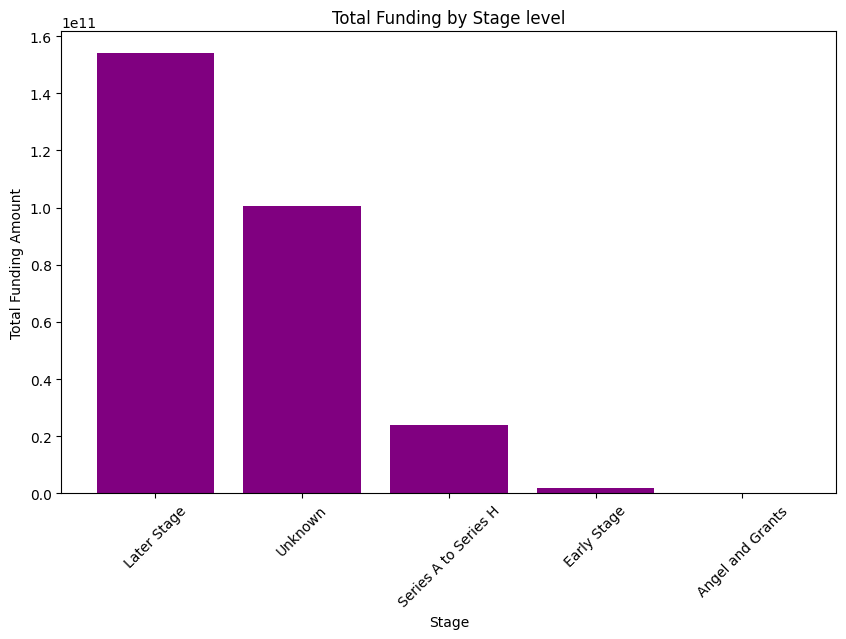

In [84]:
plt.figure(figsize=(10, 6))
plt.bar(stg_w_most_fund['Stage'], stg_w_most_fund['Amount'],color='Purple')
plt.xlabel('Stage')
plt.ylabel('Total Funding Amount')
plt.title('Total Funding by Stage level')
plt.xticks(rotation=45)  # Specify the rotation value for x-axis labels
plt.show()

2. Which location recorded the highest amount of funding received?

In [77]:
loc_highest_amt=data.groupby('HeadQuarter')['Amount'].sum().reset_index()
loc_highest_amt.sort_values(['Amount'],ascending=False,inplace=True)


In [78]:
top_5=loc_highest_amt.head()
top_5

,HeadQuarter,Amount
75,Mumbai,2.306918e+11
9,Bangalore,2.451542e+10
42,Gurugram,5.580232e+09
78,New Delhi,3.422946e+09
21,California,3.078300e+09


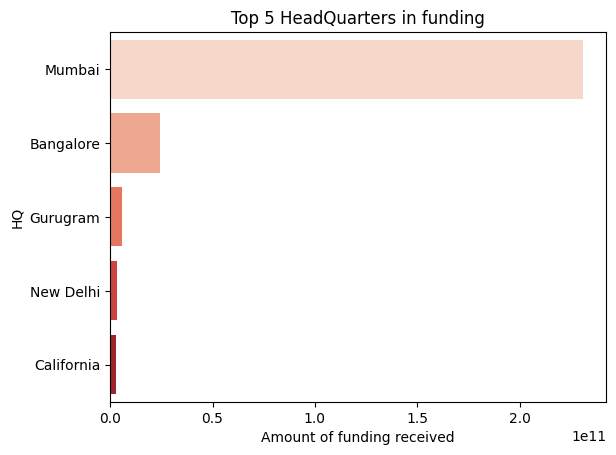

In [82]:
plt.title('Top 5 HeadQuarters in funding')
sns.barplot(y=top_5['HeadQuarter'],x=top_5['Amount'],palette='Reds')
plt.ylabel('HQ')
plt.xlabel('Amount of funding received')
plt.show()

3. How many companies received funding in each year?

In [85]:
year=data.groupby(['Funding Year']).count().reset_index()
year

,Funding Year,Company_Brand,Founded,HeadQuarter,Sector,Amount,Stage
0,2018,526,0,526,526,526,526
1,2019,89,60,89,84,89,89
2,2020,1055,842,1055,1042,1055,1055
3,2021,1209,1208,1209,1209,1209,1209


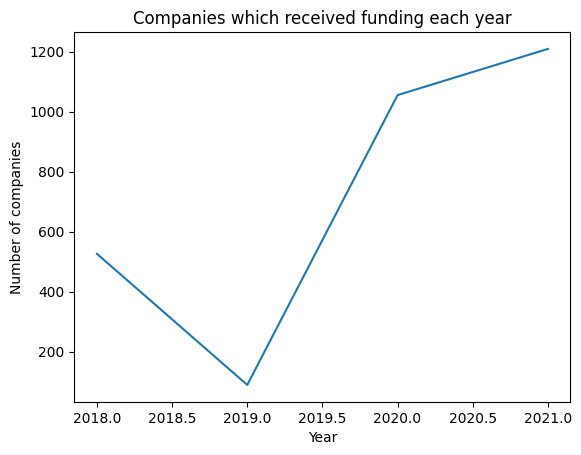

In [88]:
plt.xlabel('Year')
plt.ylabel('Number of companies')
plt.title('Companies which received funding each year')
sns.lineplot(y=year['Company_Brand'],x=year['Funding Year'])

plt.show()

4. What is the total amount funding received each year?

In [89]:
amt_per_yr=data.groupby(['Funding Year']).sum(numeric_only=True).reset_index()
amt_per_yr

,Funding Year,Founded,Amount
0,2018,0.0,6.641773e+09
1,2019,120872.0,3.336433e+09
2,2020,1696936.0,9.054742e+10
3,2021,2436120.0,1.798134e+11


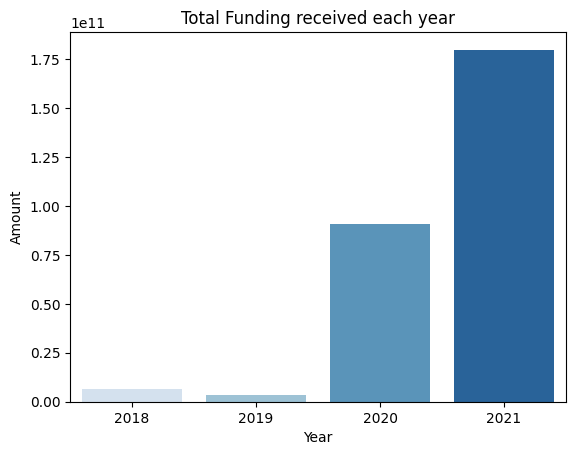

In [102]:

plt.title('Total Funding received each year')

ax = sns.barplot(y=amt_per_yr['Amount'], x=amt_per_yr['Funding Year'], palette='Blues')

ax.set(xlabel='Year', ylabel='Amount')  # Use `set` on the axis object to set labels

plt.show()


5. Which companies received the most funds?

In [99]:
companies=data.groupby('Company_Brand')['Amount'].sum().reset_index()
companies.sort_values(['Amount'],ascending=False,inplace=True)
companies
top5=companies.head()


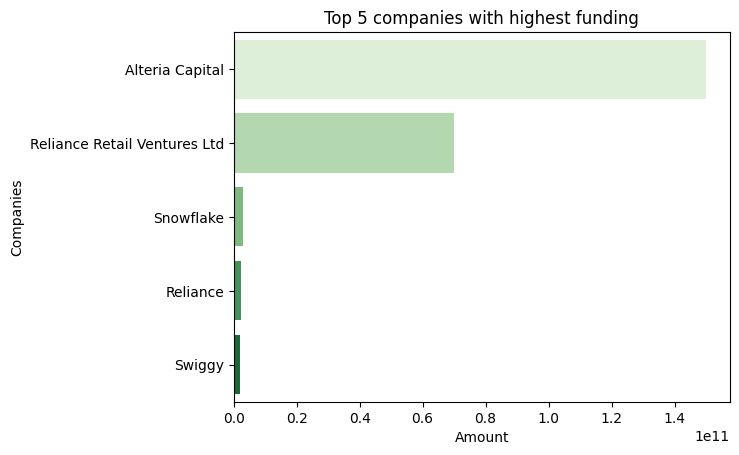

In [107]:
plt.title('Top 5 companies with highest funding')
ax = sns.barplot(y=top5['Company_Brand'], x=top5['Amount'], palette='Greens')
ax.set(xlabel='Amount', ylabel='Companies')  # Set labels using the axis object
plt.show()

# Testing hypothesis 

##### Null Hypothesis(HO): Location of the startup does not affect funding
##### Alternate Hypothesis(Ha): Location of the startup affects funding

In [109]:
#Filter data for each location
from scipy import stats


funding_f_lcn_x =data[data['HeadQuarter']=='Mumbai']['Amount']
funding_f_lcn_y =data[data['HeadQuarter']=='Singapore']['Amount']

#Perform independent sample t-test
funding_f_lcn_x =data[data['HeadQuarter']=='Mumbai']['Amount']
t_stat,p_value = stats.ttest_ind(funding_f_lcn_x,funding_f_lcn_y,equal_var=False)

#Set significance level (alpha)
alpha=0.05

#print the results
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

#Interpret the results
if p_value < alpha:
    print('Reject Null Hyothesis (H0): Location of the startup affects the funding')
else:
    print('Fail to reject the Null Hypothesis(H0): Location of the startup does not affect the funding')

T-statistic: 1.3848322086828022
P-value: 0.16675659852840335
Fail to reject the Null Hypothesis(H0): Location of the startup does not affect the funding


# Conclusion

After analysis of the Indian ecosystem, we observed that Later Stage is the stage with most funding with an amount of $154.03 billion. This proves that companies are funded most when they are well established and have a clearer product-market fit and a demonstrated ability to generate revenue.

We also gave a clear visual of locations with most funds which were Mumbai, followed by Bangalore. The other locations followed with smaller fundings.

We therefore fail to reject the null hypothesis(H0) and reject the Alternate hypothesis that location of startup does not affect funding.


#### Recommendation
We advise our team to venture  into the top companies. Namely; Alteria Capital, Reliance Retail Ventures ltd, Snowflake, Reliance and Swiggy. These are companies  in the later funding stages and that the locations do no matter whatsoever.

In [110]:

# save concatenated data to CSV
data.to_csv('India_data.csv', index=False)